8.93
Altitude = 92.0 m
Scale parameter (σ): 8.93
Arithmetic Mean = 11.7417 m/s
Expected Value = 11.1921 m/s
Alpha = 12.6289 m/s
Standard Deviation from Soot = 5.8504
Ve50 = 48.5545 m/s
Turbulence Intensity = 0.4983
Class = I
Sub-class = unspecified


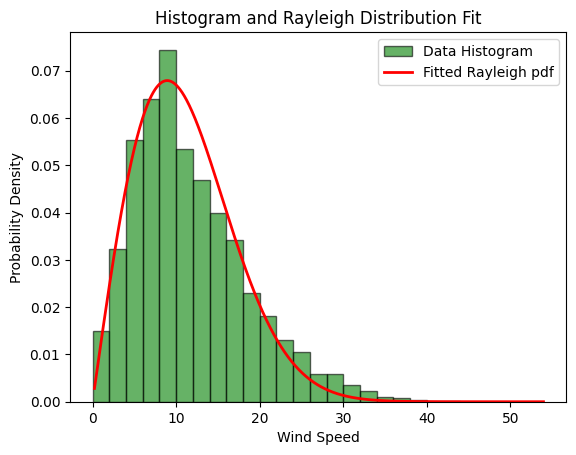

Error Sum of Squares (ESS): 0.0004
0.0003828338615825952


In [78]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sympy as sym
from scipy.stats import weibull_min, kstest, rayleigh

# For CSV files
#csv_file_path = 'path_to_your_file.csv'
df = pd.read_csv('WindSpeed2.csv')
wind_speed_matrix = df.values
# Assuming 'wind_speed_matrix' is your 2D array of wind speed data
data = wind_speed_matrix.flatten()
data = data[~np.isnan(data)]
    

    
def Rayleigh_fit(Altitude, bin_width, n, sigma, Display):
    bin_edges = np.arange(data.min(), data.max() + bin_width, bin_width)
    
    data_convert = data*(40/Altitude)**(-1/n)
    data_convert = data_convert[data_convert > 0]
    data_convert.sort()
    bin0 = round(max(data_convert)/bin_width)
    param = rayleigh.pdf(data_convert, loc=0, scale=sigma)
    
    dumb_mean = data_convert.mean()
    expected_val = sigma*math.sqrt(math.pi/2)
    
    alpha = sigma*math.sqrt(2)
    
    stdev_soot = math.sqrt((4-math.pi)/math.pi)*expected_val
    
    
    ve50_prop = 3.805e-7
    x = sym.symbols('x')
    eqn = -1 + ve50_prop + 1 - sym.exp(-(math.sqrt(math.pi)*x/2/expected_val)**2)
    ve50 = sym.nsolve(eqn,x,30)
    
    class0 = 'unspecified'
    subclass0 = 'unspecified'
    
    intensity = stdev_soot/dumb_mean
    
    
    if ve50 > 50:
        class0 = 'unspecified'
    elif ve50 > 42.5:
        class0 = 'I'
    elif ve50 > 37.5:
        class0 = 'II'
    else:
        class0 = 'III'
    
    if intensity > 0.16:
        subclass0 = 'unspecified'
    elif intensity > 0.14:
        subclass0 = 'A'
    elif intensity > 0.12:
        subclass0 = 'B'
    else:
        subclass0 = 'C'
    
    
    
    # Step 8: Plot the fitted Rayleigh PDF
    x = np.linspace(data_convert.min(), data_convert.max(), 1000)
    pdf_rayleigh = rayleigh.pdf(x, loc=0, scale=sigma)
    if Display:
        print(f"Altitude = {Altitude} m")
        print(f"Scale parameter (σ): {sigma}")
        print(f"Arithmetic Mean = {dumb_mean:.4f} m/s")
        print(f"Expected Value = {expected_val:.4f} m/s")
        print(f"Alpha = {alpha:.4f} m/s")
        print(f"Standard Deviation from Soot = {stdev_soot:.4f}")
        print(f"Ve50 = {ve50:.4f} m/s")
        print(f"Turbulence Intensity = {intensity:.4f}")
        print(f"Class = {class0}")
        print(f"Sub-class = {subclass0}")
        plt.hist(data_convert, bins=bin_edges, density=True, alpha=0.6, color='g',edgecolor='k',linewidth=1, label='Data Histogram')
        plt.plot(x, pdf_rayleigh, 'r-', linewidth=2, label='Fitted Rayleigh pdf')
        
        # Final touches
        plt.xlabel('Wind Speed')
        plt.ylabel('Probability Density')
        plt.title('Histogram and Rayleigh Distribution Fit')
        plt.legend()
        plt.show()
        
    
    hist, bin_edges = np.histogram(data_convert, bins=bin_edges, density=False)

    # Step 3: Compute midpoints of bins
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    #print(bin_midpoints)
    observed_densities = hist / (len(data_convert) * bin_width)
    # Step 4: Calculate expected frequencies using Rayleigh PDF
    expected_frequencies = rayleigh.pdf(bin_midpoints, loc=0, scale=sigma)
    
    # Step 5: Compute Error Sum of Squares (ESS)
    ess = np.sum((observed_densities - expected_frequencies) ** 2)
    
    if Display:
        print(f"Error Sum of Squares (ESS): {ess:.4f}")
    
    return ess
    
#Rayleigh_fit(Altitude = 122, bin = 20, n = 7) #Selected V120-2.2 MW IEC IIB/IEC S
#Rayleigh_fit(Altitude = 117, bin = 20, n = 7) #Selected V126-3.45 MW IEC IIB/ IEC IIA
#Rayleigh_fit(Altitude = 126, bin = 20, n = 7) #Selected V163-4.5 MW IEC IIIB
#Rayleigh_fit(Altitude = 91.5, bin = 20, n = 7) #Selected V117-4.2 MW IEC IB-T / IEC IIA-T / IEC S-T

Altitude0 = 92.0

sigma_list = np.linspace(7,15,200)
ess_list = []
for sigma0 in sigma_list:
    ess_list.append(Rayleigh_fit(Altitude = Altitude0, bin_width = 2, n = 5, sigma = sigma0, Display = False))
min_ess = min(ess_list)
min_ess_index = ess_list.index(min_ess)
sigma_best = round(sigma_list[min_ess_index],2)
print(sigma_best)

print(Rayleigh_fit(Altitude = Altitude0, bin_width = 2, n = 5, sigma = sigma_best, Display = True))

#V117-3.45 MW 91.5m IEC IB
#V117-4.20 MW 91.5m IEC IB
#V120-2.20 MW 92.0m IEC S

